In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [2]:

# Wczytanie danych z pliku CSV
data_file = "simulation_results.csv"
df = pd.read_csv(data_file)

In [3]:
# Wyświetlenie pierwszych kilku wierszy danych
print("Podgląd danych:")
print(df.head())


Podgląd danych:
   Simulation Number  Served Customers  Lost Customers  Failure Count  \
0                  1               152              17              1   
1                  2               143              48              2   
2                  3               152              19              1   
3                  4               149              33              1   
4                  5               153               0              0   

   Avg Service Time (min)  Avg Failure Duration (min)  
0                3.051840                   12.248285  
1                3.166695                   10.019207  
2                3.076011                    8.727705  
3                3.134757                    9.073430  
4                3.133346                    0.000000  


In [4]:

# Podstawowe statystyki opisowe
print("\nPodstawowe statystyki opisowe:")
print(df.describe())



Podstawowe statystyki opisowe:
       Simulation Number  Served Customers  Lost Customers  Failure Count  \
count           20.00000         20.000000        20.00000      20.000000   
mean            10.50000        150.600000        28.95000       1.100000   
std              5.91608          3.589458        15.78632       0.640723   
min              1.00000        143.000000         0.00000       0.000000   
25%              5.75000        148.750000        22.75000       1.000000   
50%             10.50000        151.000000        32.00000       1.000000   
75%             15.25000        152.250000        36.25000       1.250000   
max             20.00000        157.000000        52.00000       2.000000   

       Avg Service Time (min)  Avg Failure Duration (min)  
count               20.000000                   20.000000  
mean                 3.099391                    8.352058  
std                  0.054648                    4.101790  
min                  2.981112     

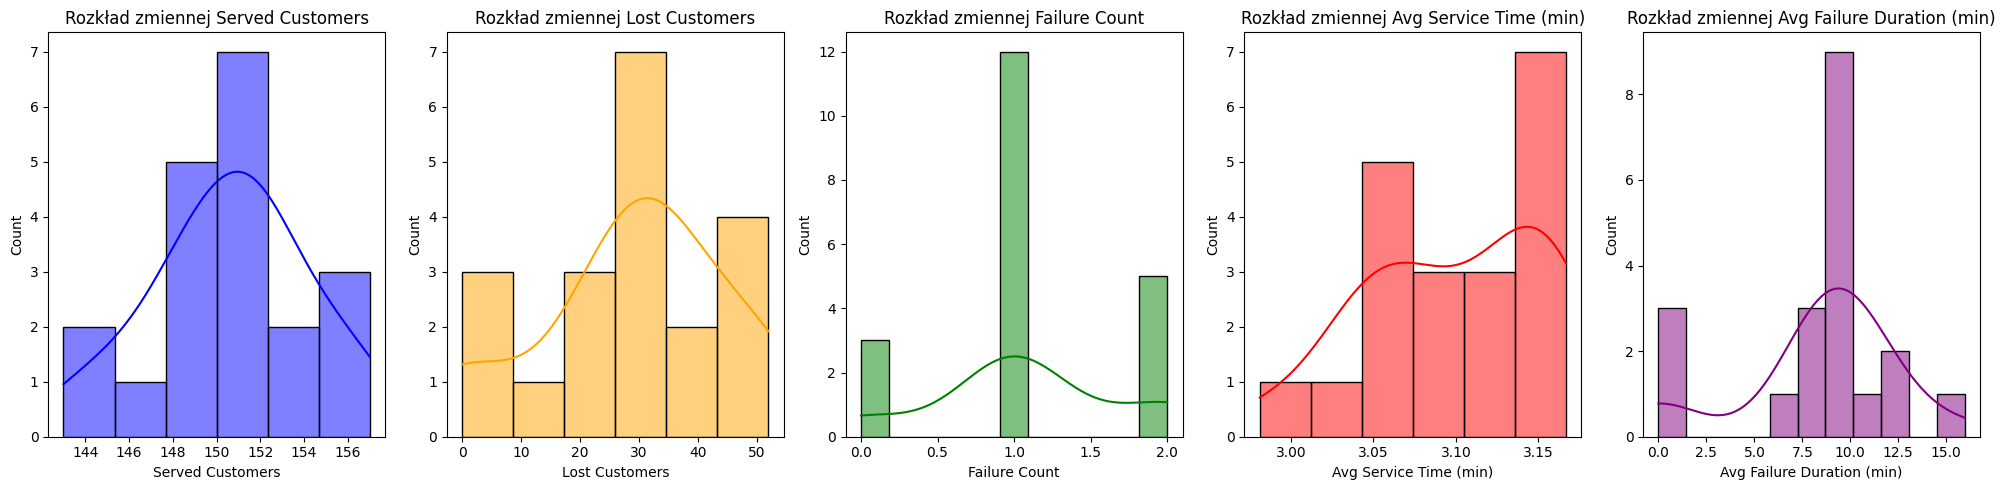

In [5]:

# Wizualizacja rozkładów zmiennych
columns_to_analyze = ["Served Customers", "Lost Customers", "Failure Count", "Avg Service Time (min)", "Avg Failure Duration (min)"]
colors = ["blue", "orange", "green", "red", "purple"]

fig, axs = plt.subplots(1, len(columns_to_analyze), figsize=(20, 5))
for i, col in enumerate(columns_to_analyze):
    sns.histplot(df[col], kde=True, ax=axs[i], color=colors[i]).set(title=f"Rozkład zmiennej {col}")
plt.tight_layout()
plt.show()


In [6]:

# Testy normalności rozkładu (Shapiro-Wilk)
print("\nTesty normalności rozkładu (Shapiro-Wilk):")
for col in columns_to_analyze:
    stat, p_value = stats.shapiro(df[col])
    print(f"{col}: stat={stat:.4f}, p={p_value:.4f}")
    if p_value < 0.05:
        print(f"  Odrzucamy hipotezę zerową - rozkład nie jest normalny.")
    else:
        print(f"  Nie odrzucamy hipotezy zerowej - rozkład jest normalny.")



Testy normalności rozkładu (Shapiro-Wilk):
Served Customers: stat=0.9788, p=0.9177
  Nie odrzucamy hipotezy zerowej - rozkład jest normalny.
Lost Customers: stat=0.9174, p=0.0885
  Nie odrzucamy hipotezy zerowej - rozkład jest normalny.
Failure Count: stat=0.7876, p=0.0006
  Odrzucamy hipotezę zerową - rozkład nie jest normalny.
Avg Service Time (min): stat=0.9231, p=0.1136
  Nie odrzucamy hipotezy zerowej - rozkład jest normalny.
Avg Failure Duration (min): stat=0.8424, p=0.0040
  Odrzucamy hipotezę zerową - rozkład nie jest normalny.


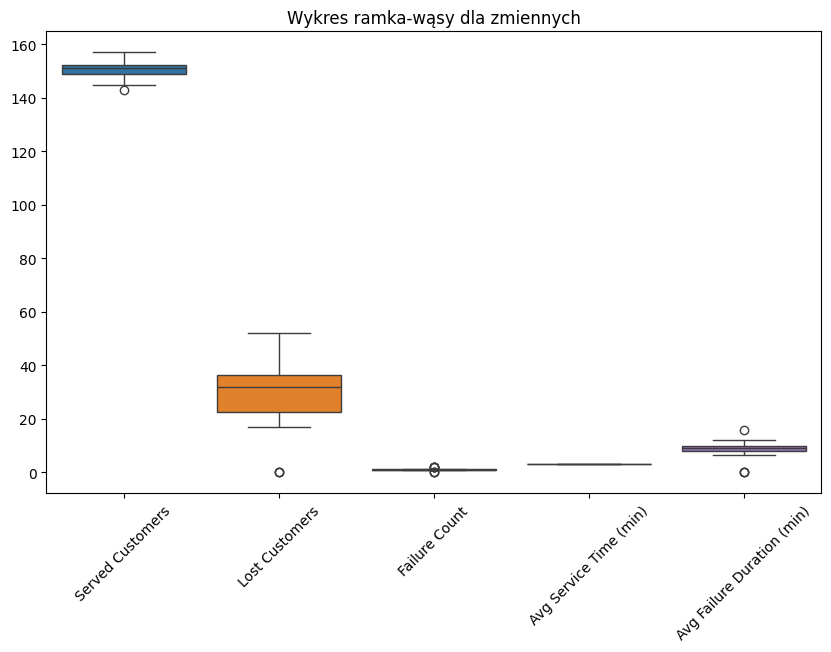

In [7]:

# Wizualizacja wartości odstających (wykres ramka-wąsy)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_analyze]).set(title="Wykres ramka-wąsy dla zmiennych")
plt.xticks(rotation=45)
plt.show()

In [8]:


# Usunięcie wartości odstających (na podstawie rozstawu międzykwartylowego)
print("\nUsuwanie wartości odstających...")
for col in columns_to_analyze:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



Usuwanie wartości odstających...


In [9]:

print("Dane po usunięciu wartości odstających:")
print(df.describe())


Dane po usunięciu wartości odstających:
       Simulation Number  Served Customers  Lost Customers  Failure Count  \
count          11.000000         11.000000       11.000000           11.0   
mean            9.363636        150.909091       29.727273            1.0   
std             5.801254          2.700168        8.591751            0.0   
min             1.000000        148.000000       17.000000            1.0   
25%             5.000000        149.000000       24.500000            1.0   
50%             8.000000        151.000000       31.000000            1.0   
75%            13.500000        152.000000       33.500000            1.0   
max            19.000000        156.000000       48.000000            1.0   

       Avg Service Time (min)  Avg Failure Duration (min)  
count               11.000000                   11.000000  
mean                 3.098307                    9.674203  
std                  0.057038                    1.682060  
min                  2.981

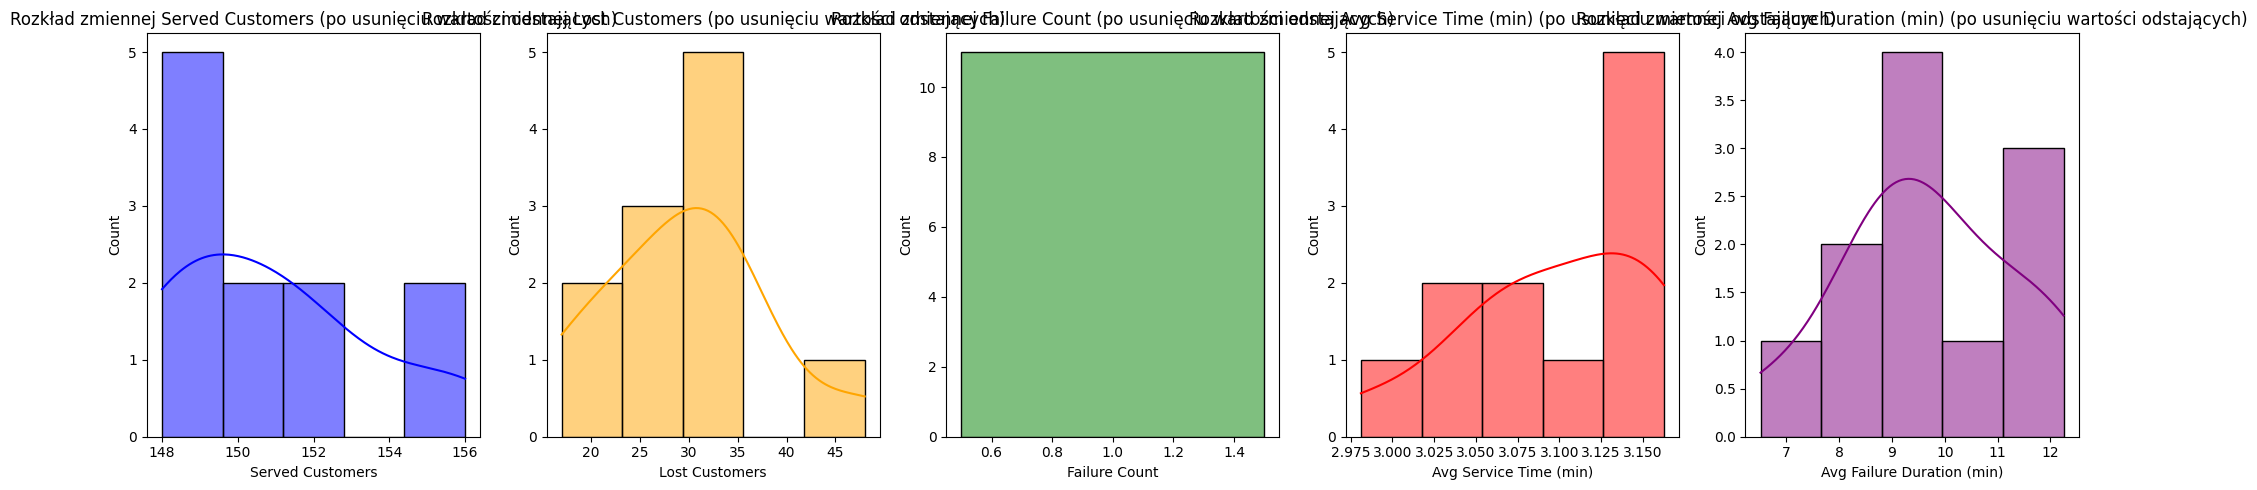

In [10]:

# Wizualizacja rozkładów po usunięciu wartości odstających
fig, axs = plt.subplots(1, len(columns_to_analyze), figsize=(20, 5))
for i, col in enumerate(columns_to_analyze):
    sns.histplot(df[col], kde=True, ax=axs[i], color=colors[i]).set(title=f"Rozkład zmiennej {col} (po usunięciu wartości odstających)")
plt.tight_layout()
plt.show()


In [11]:

# Korelacja między zmiennymi
print("\nMacierz korelacji:")
correlation_matrix = df[columns_to_analyze].corr()
print(correlation_matrix)



Macierz korelacji:
                            Served Customers  Lost Customers  Failure Count  \
Served Customers                    1.000000       -0.664992            NaN   
Lost Customers                     -0.664992        1.000000            NaN   
Failure Count                            NaN             NaN            NaN   
Avg Service Time (min)             -0.968373        0.676326            NaN   
Avg Failure Duration (min)         -0.288813        0.075098            NaN   

                            Avg Service Time (min)  Avg Failure Duration (min)  
Served Customers                         -0.968373                   -0.288813  
Lost Customers                            0.676326                    0.075098  
Failure Count                                  NaN                         NaN  
Avg Service Time (min)                    1.000000                    0.125062  
Avg Failure Duration (min)                0.125062                    1.000000  


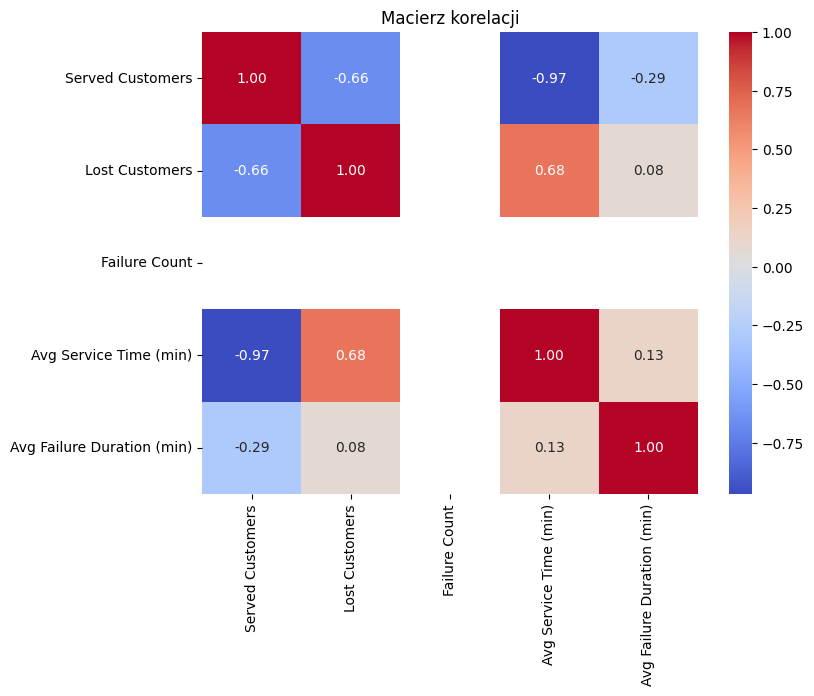

In [12]:

# Wizualizacja macierzy korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f").set(title="Macierz korelacji")
plt.show()


In [13]:

# Testy statystyczne (np. test t-Studenta dla dwóch grup)
print("\nTest t-Studenta dla 'Served Customers' i 'Lost Customers':")
t_stat, p_value = stats.ttest_ind(df["Served Customers"], df["Lost Customers"], equal_var=False)
print(f"t-stat={t_stat:.4f}, p={p_value:.4f}")
if p_value < 0.05:
    print("  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.")
else:
    print("  Nie odrzucamy hipotezy zerowej - różnice nie są istotne statystycznie.")


Test t-Studenta dla 'Served Customers' i 'Lost Customers':
t-stat=44.6271, p=0.0000
  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.
